In [1]:
from numpy import zeros, arange
import matplotlib.pyplot as p

In [2]:
def membrana(V, Er, tau, RI):  # dinâmica da membrana passiva
    return  ((Er-V) + RI)/tau


def pulso_retangular(t, t0, tf, amplitude):
    pulso = zeros(len(t))
    pulso[(t >= t0) & (t <= tf)] = amplitude
    return pulso


def integra_e_dispara_pulsos(pulsos = []):
    ######
    # Parâmetros da membrana
    ######
    tau = 10  # constante temporal da membrana (ms)
    Er = -70  # potencial de repouso da membrana (mV)
    limiar = -50  # limiar para disparo de PA (mV)
    reset = -75  # valor para reinício de Vm após PA (mV)

    ######
    # Parâmetros de integração
    ######
    delta_t = 0.01  # passinho de tempo
    n_pontos = 10000  # quantos passinhos dar
    V_inicial = Er  # valor do potencial V para tempo = 0

    # Cria espaço para armazenar Vm 
    V = zeros(n_pontos)
    V[0] = V_inicial  # condição inicial
    
    # Lista dos passos em que ocorrem disparos
    disparos = []
    
    # Tempo
    t = arange(n_pontos) * delta_t
    
    # Estímulo: soma de pulsos retangulares, armazenados numa lista
    #           contendo dicionários que definem cada pulso.
    I = sum(pulso_retangular(t, p['inicio'], p['fim'], p['amplitude']) 
                             for p in pulsos)
    
    for i in range(n_pontos - 1):
        V[i + 1] = V[i] + delta_t * membrana(V[i], Er, tau, I[i])  # passo Euler
        
        if V[i + 1] >= limiar:  # condição para ocorrência de disparo
            V[i + 1] = reset  # se disparou, reiniciamos o potencial de membrana
            disparos.append(i)  # armazena o i de ocorrência do disparo
    
    return t, V, I, disparos



O modelo disparou 6 vezes!


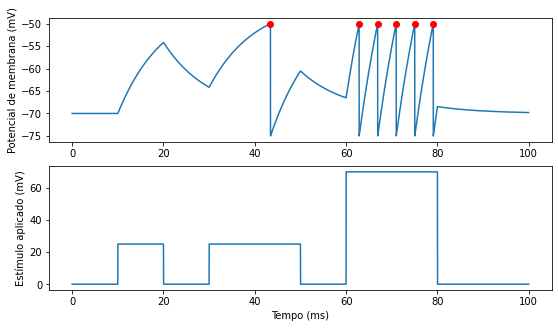

In [5]:
# Vamos criar uma lista com parâmetros de três pulsos retangulares (dicionários).
# Cada dicionário define o inicio e o fim do pulso (ms), e sua amplitude (mV).
pulsos = [{'inicio':10, 'fim': 20, 'amplitude': 25}, 
          {'inicio':30, 'fim': 50, 'amplitude': 25},
          {'inicio':60, 'fim': 80, 'amplitude': 70}]

# Simulamos o modelo Integra e Dispara com o estímulo definido acima
# Ela retorna 4 listas: tempo, potencial de membrana, estímulo e disparos.
t, V, I, spikes = integra_e_dispara_pulsos(pulsos)

p.figure(figsize=(9,5))
p.subplot(211)  # Faremos um gráfico com dois painéis, esse é o primeiro.
p.plot(t, V)
p.plot(t[spikes], V[spikes], 'or')  # bolinhas vermelhas nos disparos
p.ylabel('Potencial de membrana (mV)')

p.subplot(212)  # Faremos um gráfico com dois painéis, esse é o segundo.
p.plot(t,I)
p.ylabel('Estímulo aplicado (mV)')
p.xlabel('Tempo (ms)')

print(f'O modelo disparou {len(spikes)} vezes!')

